# LMDZOR-STD-NY07-CUSTOM-200

conda env: new `phd_v3` (in `envs/phd`)

## LMDZOR-STD-REF

```fortran
! LMDZOR-STD-REF
frac_snow_veg(:) = tanh(snowdepth(:)/(0.025*(snowrho_ave(:)/50.)))
```
https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007.ipynb

- Jean-Zay WORK: `/gpfsdswork/projects/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/LMDZOR-STD-REF`
- Jean-Zay STORE: `/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/` 
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/catalog.html


## LMDZOR-STD-NY07-CUSTOM-200

```fortran
! LMDZOR-STD-NY07-CUSTOM-200
frac_snow_veg(:) = tanh(snowdepth(:)/(0.025*(snowrho_ave(:)*(1+zstd_not_filtered(:)/200.)/50.)))
```
https://github.com/mickaellalande/PhD/blob/master/local/SCE_SWE_parametization/Niu2007-std.ipynb

- Jean-Zay WORK: `/gpfswork/rech/goe/ufz23bm/SCA_parameterization/modipsl/config/LMDZOR_v6/LMDZOR-STD-NY07-CUSTOM-200`
- Jean-Zay STORE: `/gpfsscratch/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200`
- THREDDS: `/gpfsdsmnt/ipsl/dods/pub/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/`
- CICLAD: `/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200T/` 
- https://vesg.ipsl.upmc.fr/thredds/catalog/idris_work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/catalog.html

## Import modules

In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [3]:
xr.__version__

'0.16.0'

In [36]:
regridder = xe.Regridder(a, a, 'bilinear')

Create weight file: bilinear_143x144_143x144.nc


In [37]:
type(regridder)

xesmf.frontend.Regridder

In [39]:
type(snc_ref)

xarray.core.dataset.Dataset

In [99]:
a = 'ae'

In [102]:
snc_ref

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, time_counter: 120)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
    time_centered         (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter          (time_counter) object 1980-01-16 00:00:00 ... 1989-...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    Areas                 (lat, lon) float32 dask.array<chunksize=(143, 144), meta=np.ndarray>
    Contfrac              (lat, lon) float32 dask.array<chunksize=(143, 144), meta=np.ndarray>
    frac_snow             (time_counter, lat, lon) float32 dask.array<chunksize=(120, 143, 144), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Sep-30 15:03:38 GMT
    uuid:         d0005e2f-ca32-4592-a9c9-83fe84519ae9
    LongName:     LMDZOR configuration
    history:      Wed Sep 30 18:46:23 2020: ncrcat -C --buffer_size 838860800...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [107]:
period = slice('1999','2001')

In [110]:
np.testing.assert_array_less(int(period.start),int(snc_ref.isel(time_counter=0)['time_counter.year'].values),err_msg='aze')

AssertionError: 
Arrays are not less-ordered
aze
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 19
Max relative difference: 0.00959596
 x: array(1999)
 y: array(1980)

In [100]:
np.testing.assert_array_less(3,2,err_msg=f"aze{a}")

AssertionError: 
Arrays are not less-ordered
azeae
Mismatched elements: 1 / 1 (100%)
Max absolute difference: 1
Max relative difference: 0.5
 x: array(3)
 y: array(2)

In [ ]:
xe.Regridder()

In [139]:
# a = u.get_obs('snc', 'NOAA_CDR_v1', period=slice('1979','2019'), machine='CICLAD', regrid=None)
a = u.get_obs('snc', 'MEaSUREs_v1', period=slice('1999','2012'), machine='CICLAD', regrid=snc_ref)


Reuse existing file: bilinear_720x720_143x144_peri.nc


/data/mlalande/miniconda3/envs/phd_v3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


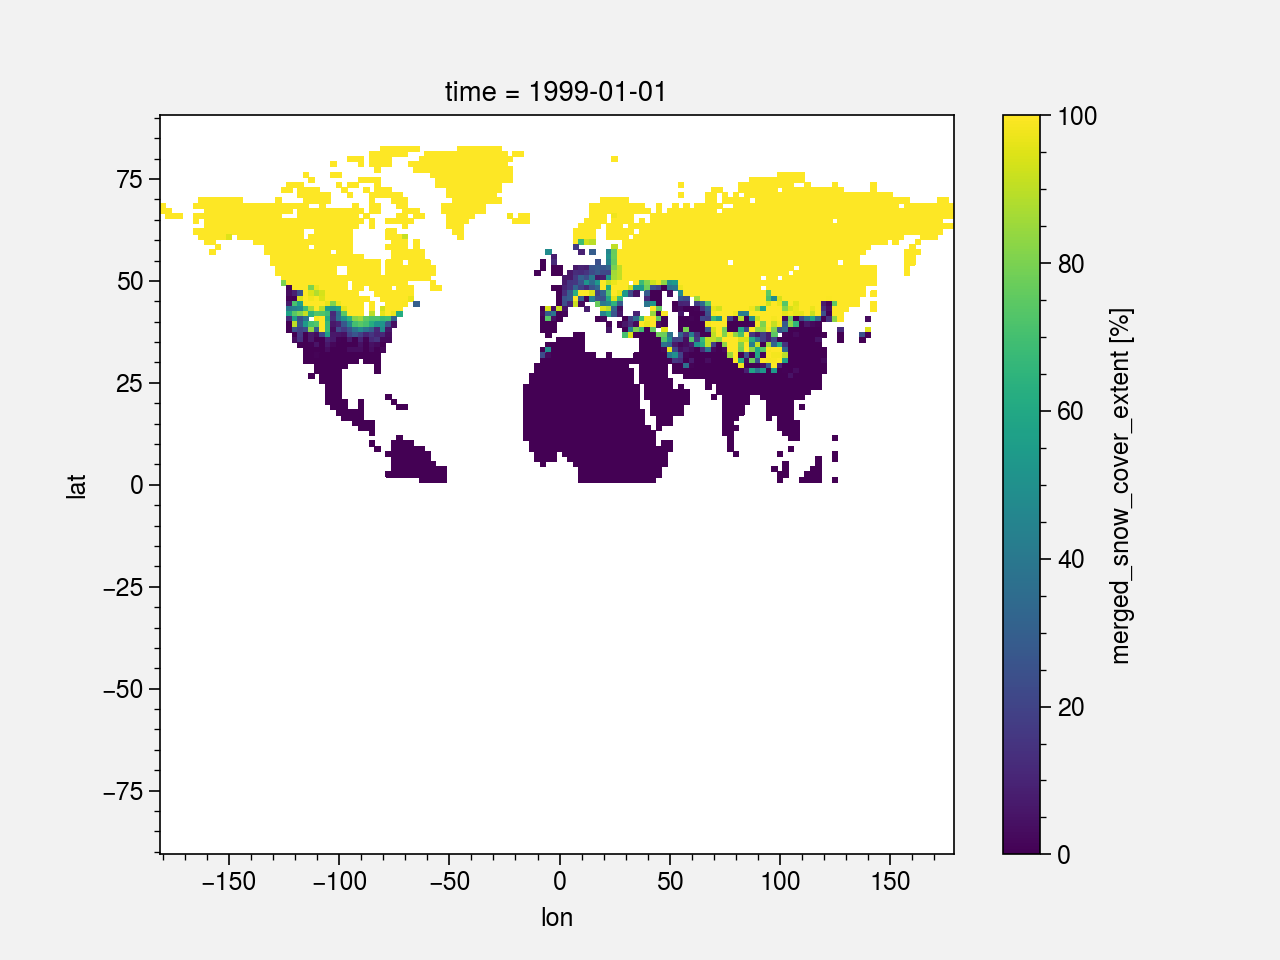

In [140]:
a[0].plot()

In [141]:
a.attrs

{'regrid_method': 'bilinear',
 'units': '%',
 'obs_longname': 'MEaSUREs Northern Hemisphere Terrestrial Snow Cover Extent Daily 25km EASE-Grid 2.0, Version 1',
 'obs_shortname': 'MEaSUREs'}

## Define paths

In [29]:
snc_ref.sel(time_counter=slice(None))

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, time_counter: 120)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
    time_centered         (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter          (time_counter) object 1980-01-16 00:00:00 ... 1989-...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    Areas                 (lat, lon) float32 dask.array<chunksize=(143, 144), meta=np.ndarray>
    Contfrac              (lat, lon) float32 dask.array<chunksize=(143, 144), meta=np.ndarray>
    frac_snow             (time_counter, lat, lon) float32 dask.array<chunksize=(120, 143, 144), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Sep-30 15:03:38 GMT
    uuid:         d0005e2f-ca32-4592-a9c9-83fe84519ae9
    LongName:     LMDZOR configuration
    history:      Wed Sep 30 18:46:23 2020: ncrcat -C --buffer_size 838860800...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [5]:
path_SRF_ref = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/SRF/Analyse/TS_MO/'
path_ATM_ref = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-REF/ATM/Analyse/TS_MO/'

path_SRF_new = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/SRF/Analyse/TS_MO/'
path_ATM_new = '/thredds/idris/work/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/LMDZOR-STD-NY07-CUSTOM-200/ATM/Analyse/TS_MO/'

In [6]:
snc_ref = xr.open_mfdataset(path_SRF_ref+'*_frac_snow.nc', combine='by_coords')
snc_new = xr.open_mfdataset(path_SRF_new+'*_frac_snow.nc', combine='by_coords')

In [7]:
clim_ref = snc_ref.frac_snow.mean('time_counter')
clim_new = snc_new.frac_snow.mean('time_counter')
diff = clim_new - clim_ref

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


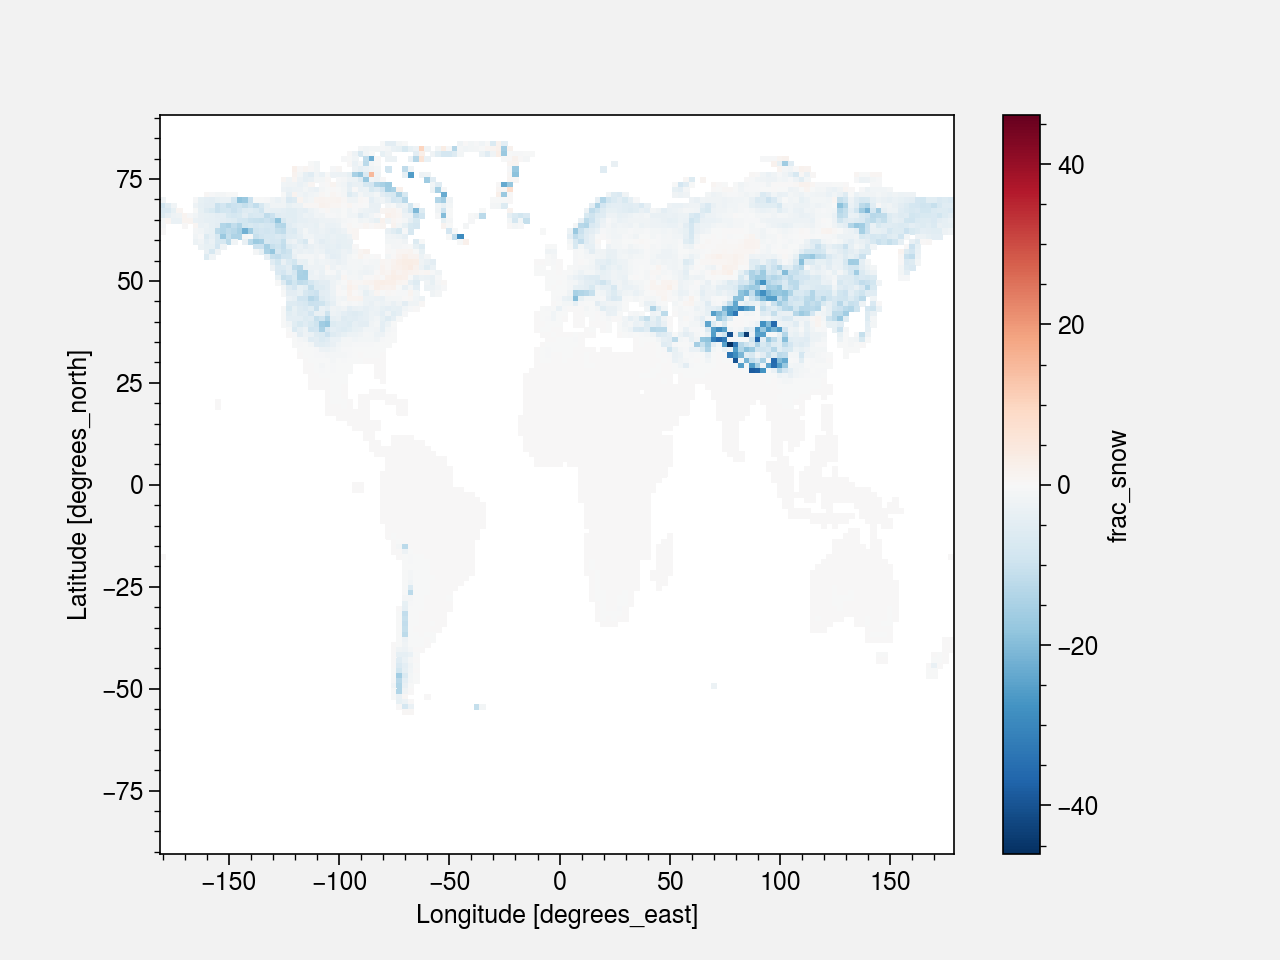

In [13]:
diff.plot()

## Define variables

In [2]:
var_LMDZ = 'frac_snow'
folder_LMDZ = 'SRF'

# Define common period (remove 2 years at the beginning)
period = slice('1982','1990')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

In [3]:
path_GMTED2010 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-GMTED2010-00625deg/'+folder_LMDZ+'/Output/MO'
model_GMTED2010 = xr.open_mfdataset(path_GMTED2010+'/*.nc', combine='by_coords')[var_LMDZ]
model_GMTED2010

<xarray.DataArray 'frac_snow' (time_counter: 132, lat: 143, lon: 144)>
dask.array<concatenate, shape=(132, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 00:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


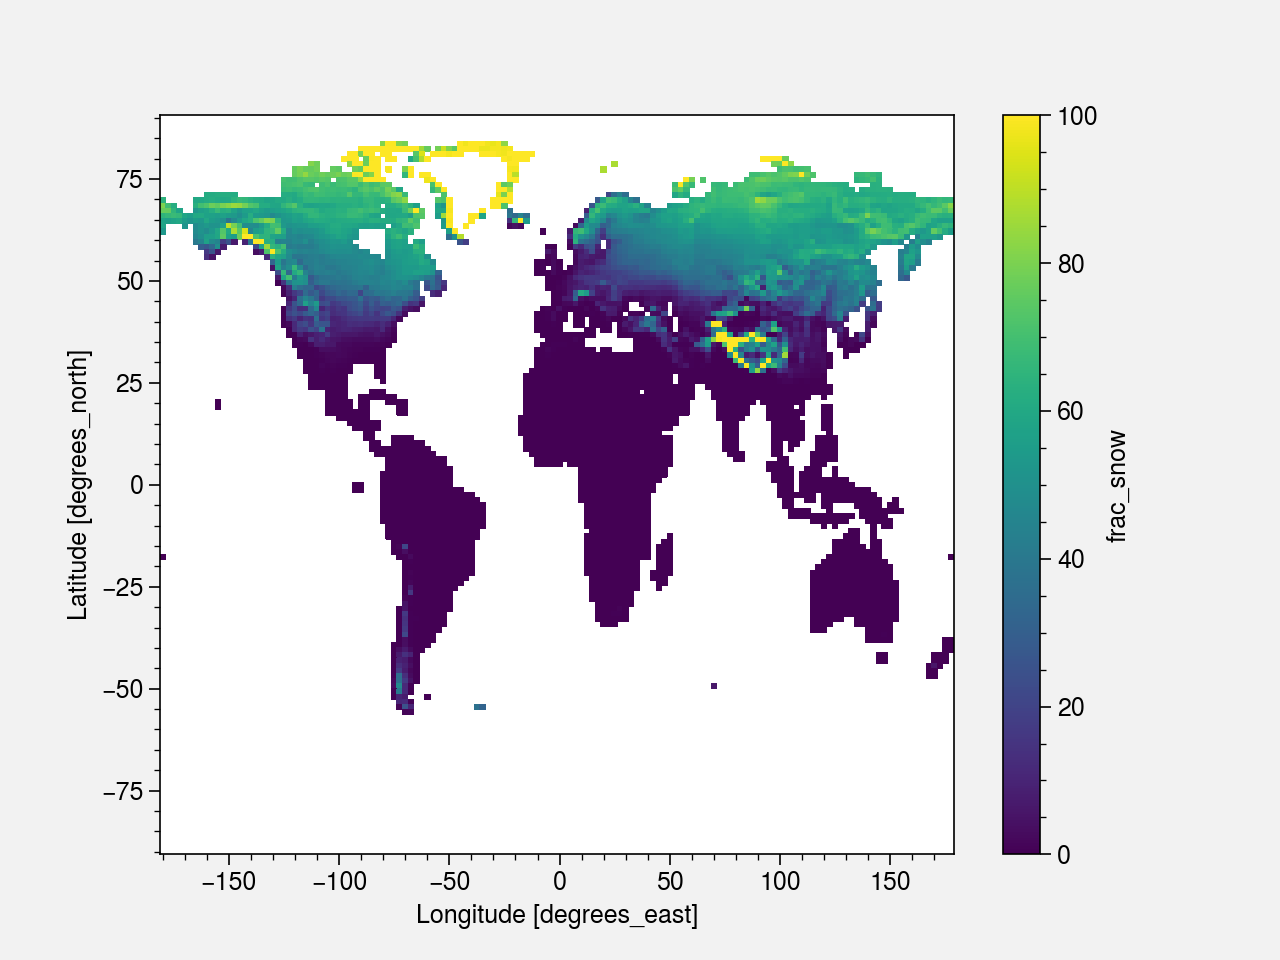

In [4]:
model_GMTED2010_clim = model_GMTED2010.sel(time_counter=period).mean('time_counter')
model_GMTED2010_clim.plot()

In [5]:
path_def = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def/'+folder_LMDZ+'/Output/MO'
model_def = xr.open_mfdataset(path_def+'/*.nc', combine='by_coords')[var_LMDZ]
model_def

<xarray.DataArray 'frac_snow' (time_counter: 132, lat: 143, lon: 144)>
dask.array<concatenate, shape=(132, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 00:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


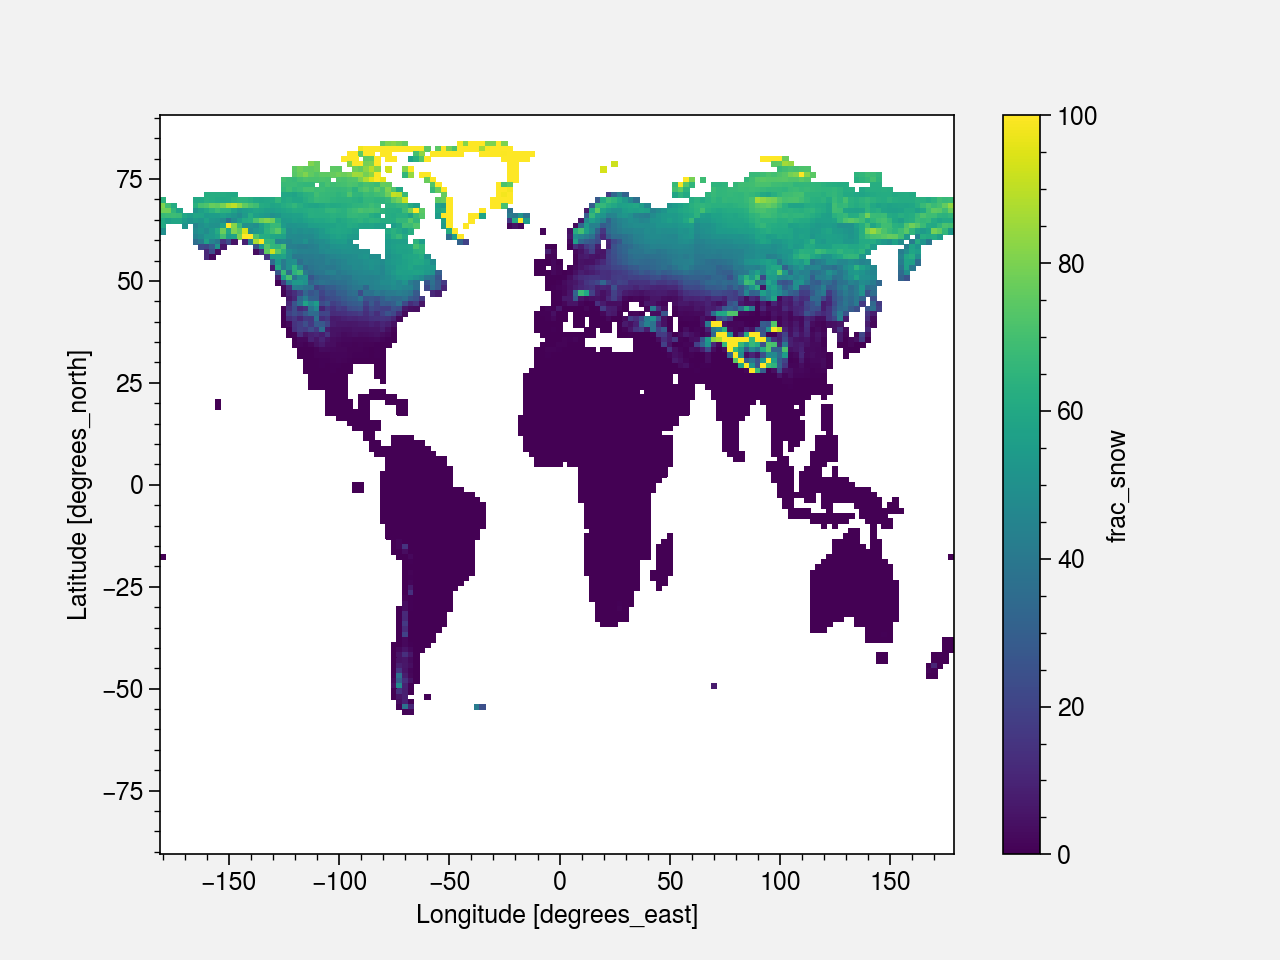

In [6]:
model_def_clim = model_def.sel(time_counter=period).mean('time_counter')
model_def_clim.plot()

# Load obs
## NOAA Climate Data Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00756

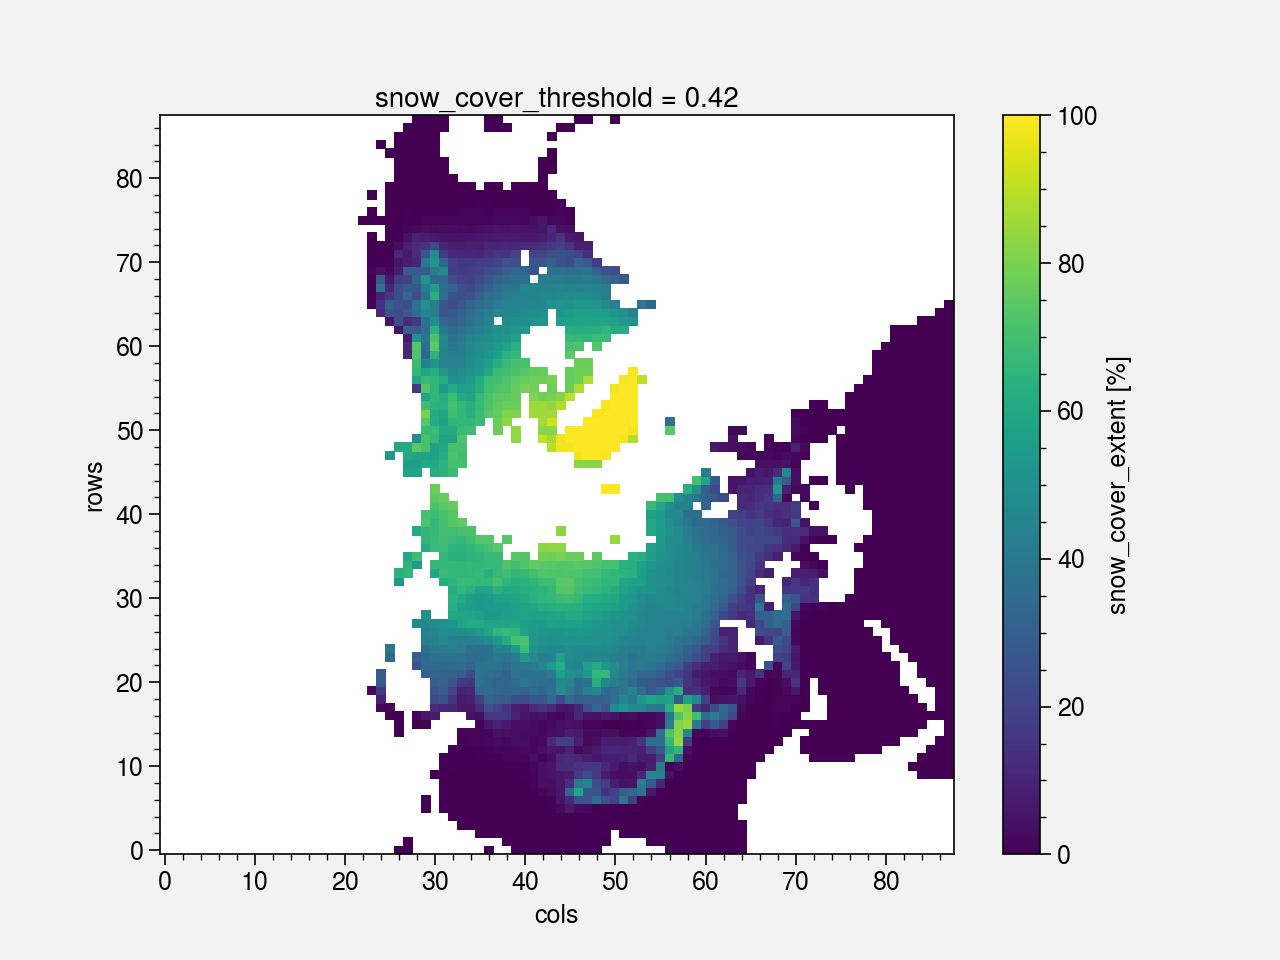

In [7]:
obs_longname = 'NOAA Climate Data Record (CDR) Version 1'
obs_name = 'NOAA CDR'

ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period).mean('time')
with xr.set_options(keep_attrs=True): # Get the snc variable, keep only land data and convert to %
    obs_clim = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100   
obs_clim.attrs['units'] = '%'
obs_clim = obs_clim.rename({'longitude': 'lon', 'latitude': 'lat'}) # Rename lon and lat for the regrid
# obs = obs.resample(time='1MS').mean('time', skipna='False', keep_attrs=True) # Resamble data per month (from per week)
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

Regrid towards HR-CM6 with lower resolution (but obs lower... needs better obs...)

In [8]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

regridder_obs = xe.Regridder(obs_clim, model_def_clim, 'bilinear', periodic=False, reuse_weights=True)
regridder_obs = add_matrix_NaNs(regridder_obs)
obs_clim_regrid = regridder_obs(obs_clim)

Reuse existing file: bilinear_88x88_143x144.nc


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# Plot differences

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


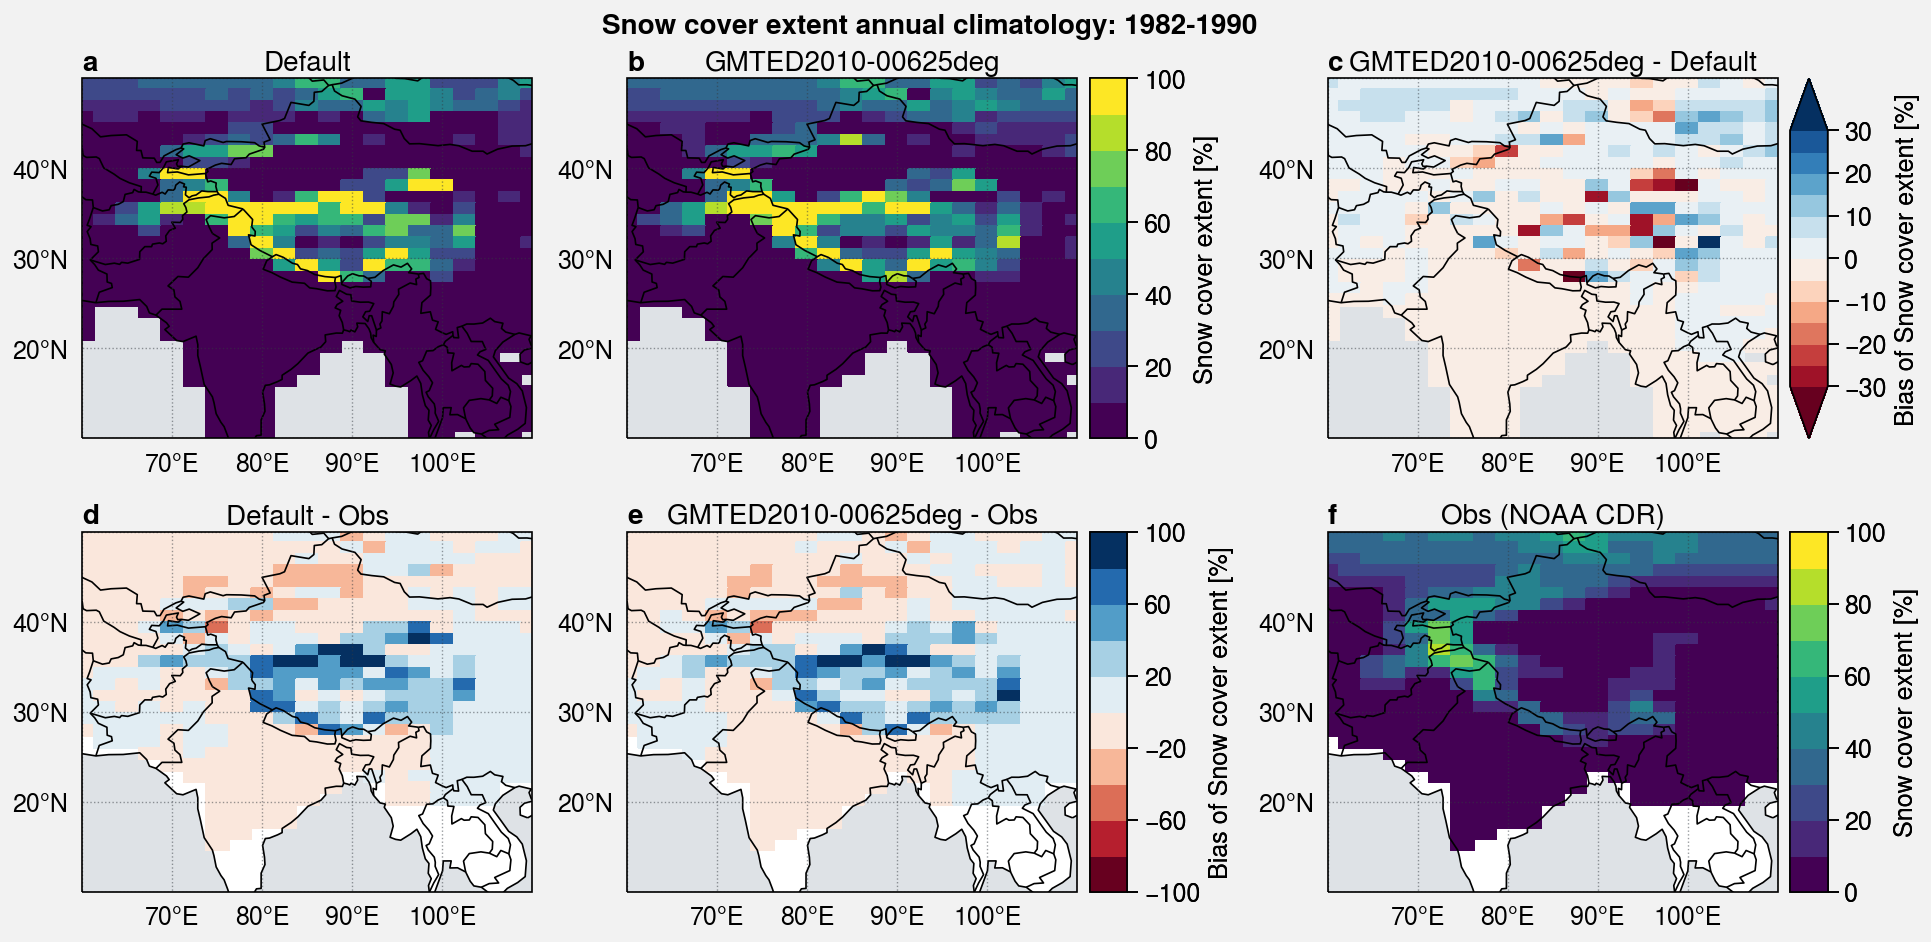

In [13]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

levels_diff = plot.arange(-30,30,5)
cmap_diff = 'BuRd_r'
extend_diff = 'both'

levels_bias = plot.arange(-100,100,20)
cmap_bias = 'BuRd_r'
extend_bias = 'neither'

# First row: differences GMTED2010-00625deg / not guide
axs[0].pcolormesh(model_def_clim, cmap=cmap, levels=levels)
axs[0].format(title='Default')

m1 = axs[1].pcolormesh(model_GMTED2010_clim, cmap=cmap, levels=levels)
axs[1].format(title='GMTED2010-00625deg')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_GMTED2010_clim - model_def_clim, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[2].format(title='GMTED2010-00625deg - Default')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

m3 = axs[3].pcolormesh(model_def_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[3].format(title='Default - Obs')

axs[4].pcolormesh(model_GMTED2010_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[4].format(title='GMTED2010-00625deg - Obs')
axs[4].colorbar(m3, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/'+var+'_'+period.start+'-'+period.stop+'.jpg')
# f.save('img/'+var+'_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_'+period.start+'-'+period.stop+'.pdf')